# Spectrum (cont'd)

Read again the previous lecture; it is your lifeboat about spectrograms and spectrum, as it deals with the most intuitive application, everyday sounds. 

## Time series of Doppler signal 

Spectrum and spectrogram are important in navigation, both underwater acoustic navigation and radio satellite navigation at the surface and for aircrafts (Global Positioning System - GPS). We now analyze a simple case of navigation data, the Doppler signal of the horn of a passing car, which is identical in concept with the Doppler radio signal of a passing satellite. 

Read more on the Doppler effect in [wikipedia](http://en.wikipedia.org/wiki/Doppler_effect) and listen to [Khan Academy](https://www.khanacademy.org/test-prep/mcat/physical-processes/sound/v/doppler-effect-formula-for-observed-frequency). 

In [2]:
# Listen to the soundtrack by running this cell, then clicking the play button
from IPython.display import Audio
Audio('../../ocn463-data/sound/dopplercar.wav')

In [3]:
# read .wav file with sample rate FS and audio data y
import scipy.io.wavfile as wavread
FS, y = wavread.read('../../ocn463-data/sound/dopplercar.wav')
y = y.astype(float)
FS

44100

Text(0, 0.5, 'amplitude')

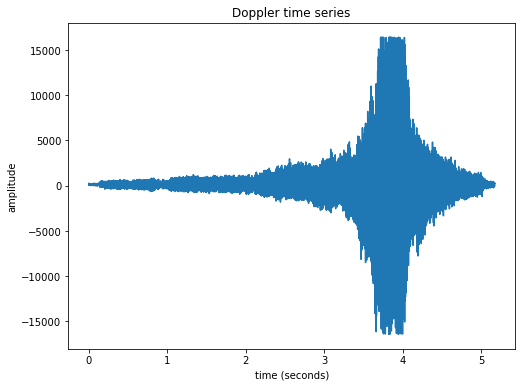

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(0,len(y))/FS, y)
ax.set_title('Doppler time series')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('amplitude')

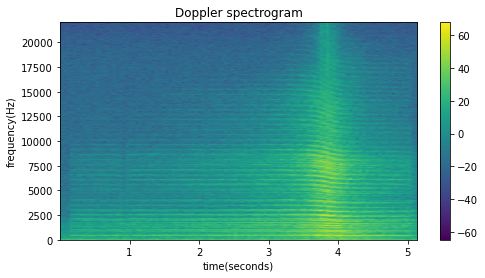

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(FS/20), Fs=FS, mode='magnitude')
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency(Hz)')
ax.set_title('Doppler spectrogram')
plt.colorbar(image, ax=ax);

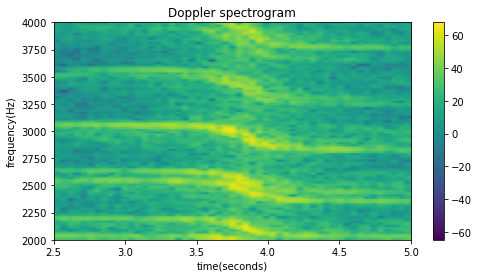

In [6]:
fig, ax = plt.subplots(figsize=(8,4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(FS/20), Fs=FS, mode='magnitude')
ax.set_ylim(bottom=2000, top=4000)
ax.set_xlim(left=2.5, right=5)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency(Hz)')
ax.set_title('Doppler spectrogram')
plt.colorbar(image, ax=ax)

The fundamental frequencies are 425 and 475 Hz. Note how complex the spectrum is: two fundamental frequencies, full of harmonics. A horn is designed to be heard over noise. A strong Doppler shift between incoming and outgoing horn on the car is observed. To estimate the Doppler shift: 

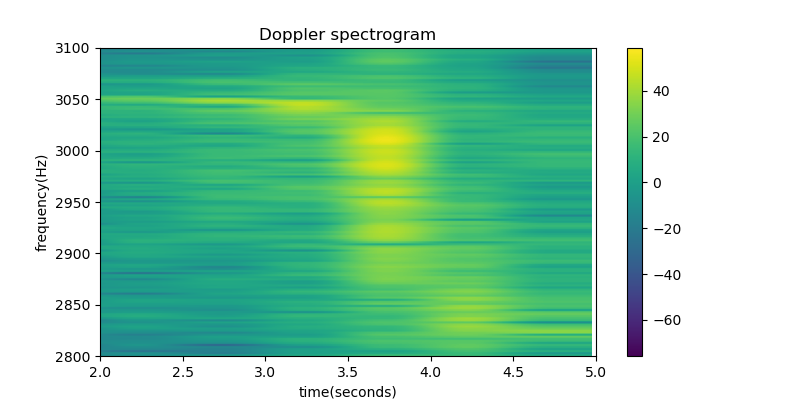

In [7]:
F0=440# need to change backend to make interactive plot
%matplotlib widget
import matplotlib.pyplot as plt

# plot zoomed spectrogram
fig, ax = plt.subplots(figsize=(8, 4))
spectgram, freqs, bins, image = ax.specgram(y, NFFT=int(FS/2), Fs=FS, mode='magnitude')
ax.set_ylim(bottom = 2800, top = 3100)
ax.set_xlim(left = 2, right = 5)
ax.set_xlabel('time(seconds)')
ax.set_ylabel('frequency(Hz)')
ax.set_title('Doppler spectrogram')
plt.colorbar(image, ax = ax);

Right click to the left of the plot above and then click on "Create new view for output". Then the location of your cursor on the plot appears just below the plot in the new window. Check the time and frequencies before and after the passage of the car, for example the one at 3000 Hz: 

In [ ]:
# two sample points
speclocs = [(3.009, 3052),
            (4.506, 2825)]

# calculate mean frequency and frequency difference from mean
specmean = np.mean(speclocs, axis=0)[-1]
specdiff = np.diff(speclocs, axis=0)[0][-1]/2

# print values to read
print('Mean frequency = ' + '{:.0f}'.format(specmean) + ' Hz')
print('Frequency difference from mean = ' + '{:.0f}'.format(np.absolute(specdiff)) + ' Hz')

That shows that the mean frequency (of that harmonic) was 2938 Hz, and the frequency shift was +-114 Hz. There is an approximate relationship between the Doppler shift Df of a moving sound or radio source of frequency f, and its velocity V, as long as V << C (much smaller): 

     V  =  C * Df / f
     
where C is the propagation speed of the wave (300000 km/s for light/radio, 340 m/s for sound in air, 1500 m/s for sound in water). We can thus infer:

     V = 13.2 m/s = 47.5 km/h = 29.5 mph.


The time at which the Doppler shift goes through 0 (about 3.8 s) is called the "point of closest approach".

Estimating this point is the base for satellite navigation. A back-of-the-envelope approximate calculations suggested below will help understand the concept, left for students to resolve individually.

A transmitter of 1.572 GHz is installed on a GPS satellite, orbiting at an altitude of about 20,200 km with an orbital period of about 12 hours. Estimate the maximum Doppler shift that will be observed by a ground observer. 